In [ ]:
import pandas as pd
import geopandas as gpd

river = gpd.read_file('./river/level1/level1.shp')
river = river[river['NAME'] == '青溪'] 
print(river)
# files = pd.DataFrame(river)
# files.head(100)

# files.to_csv('test_river.csv', encoding='utf-8-sig')

Empty GeoDataFrame
Columns: [FID_一级河, NAME, Shape_Leng, 河流等级, FID_Provic, NAME_1, Shape_Le_1, geometry]
Index: []


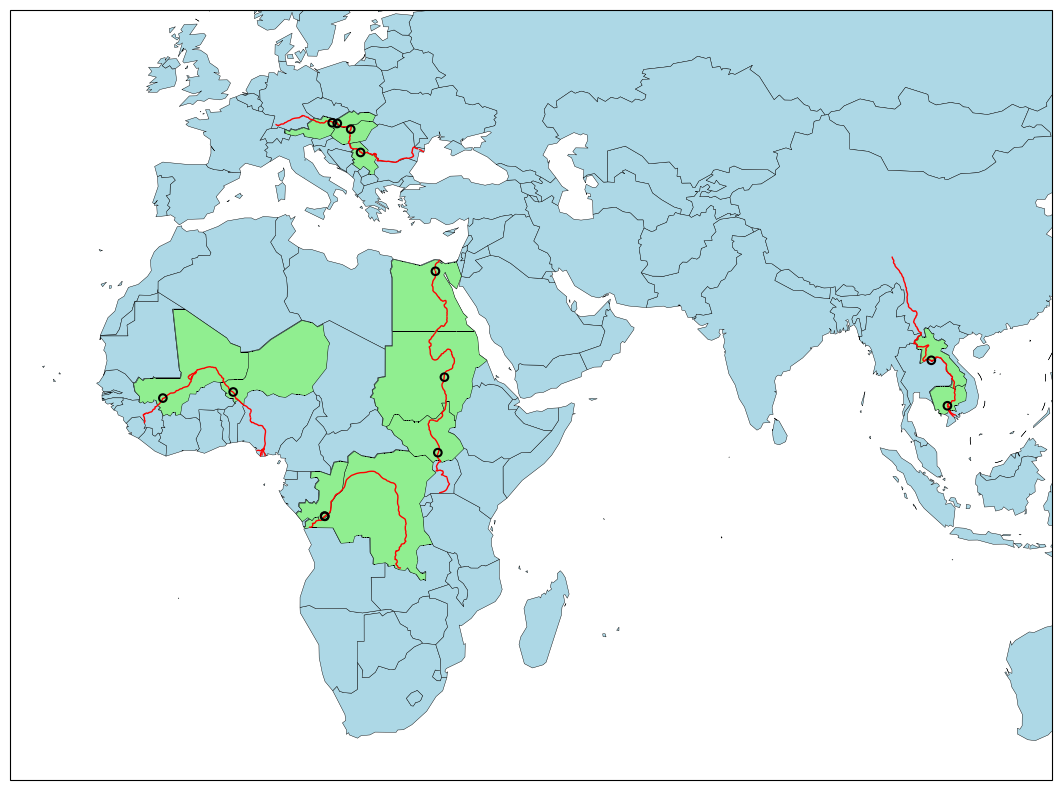

In [10]:
# 流经首都的河流

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 读取数据
world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
rivers = gpd.read_file('./river/ne_50m_rivers_lake_centerlines.shp')
rivers = rivers.to_crs(ccrs.PlateCarree())


countries_to_fill = ['柬埔寨', '老挝', '刚果（金）', '刚果（布）', '马里', '尼日尔', '埃及', '苏丹', '南苏丹', '奥地利', '匈牙利', '塞尔维亚', '斯洛伐克']
rivers_to_fill = ['Nile', 'White Nile', 'Damietta Branch', 'Mekong', 'Lualaba', 'Congo', 'Danube', 'Sfântu Gheorghe branch', 'Niger']
lat1, lon1 = 17.96232562580174, 102.61118194031367   # 万象
lat2, lon2 = 11.557384130754683, 104.92773994940228   # 金边
lat3, lon3 = 30.046440937603307, 31.235117558539653   # 开罗
lat4, lon4 = 15.600067138432657, 32.529402767155034   # 喀土穆
lat5, lon5 = 4.854133127611956, 31.582505970121243   # 朱巴
lat6, lon6 = -4.303620336484073, 15.31254804749304   # 金沙萨
lat7, lon7 = -4.271532257282476, 15.277094297066055   # 布拉柴维尔
lat8, lon8 = 12.648269458834022, -7.996869335873068   # 巴马科
lat9, lon9 = 13.511233652392134, 2.125040884212267   # 尼亚美
lat10, lon10 = 48.223546608523755, 16.382827282546447   # 维也纳
lat11, lon11 = 48.14774427219382, 17.110161701671508   # 布拉迪斯拉发
lat12, lon12 = 47.498487991715976, 19.040593166560612   # 布达佩斯
lat13, lon13 = 44.81879553526021, 20.460454417360314   # 贝尔格莱德



fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for country in countries_to_fill:
    country_data = world[world['name'] == country]
    if not country_data.empty:
        country_data.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

for river in rivers_to_fill:
    river_data = rivers[rivers['name_en'] == river]
    if not river_data.empty:
        river_data.plot(ax=ax, color='red', linewidth=1, transform=ccrs.PlateCarree())

lonList = [lon1, lon2, lon3, lon4, lon5, lon6, lon7, lon8, lon9, lon10, lon11, lon12, lon13]
latList = [lat1, lat2, lat3, lat4, lat5, lat6, lat7, lat8, lat9, lat10, lat11, lat12, lat13]
ax.scatter(lonList, latList, edgecolor='black', facecolor='none', marker='o', s=30, linewidths=1.5, zorder=5, transform=ccrs.PlateCarree())


# 设置横纵坐标刻度不可见
ax.tick_params(axis='both', which='both', length=0, labelsize=0)

# 设置地图显示范围
ax.set_extent([120, -30, -40, 60], crs=ccrs.PlateCarree())

# 保存图像并显示
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


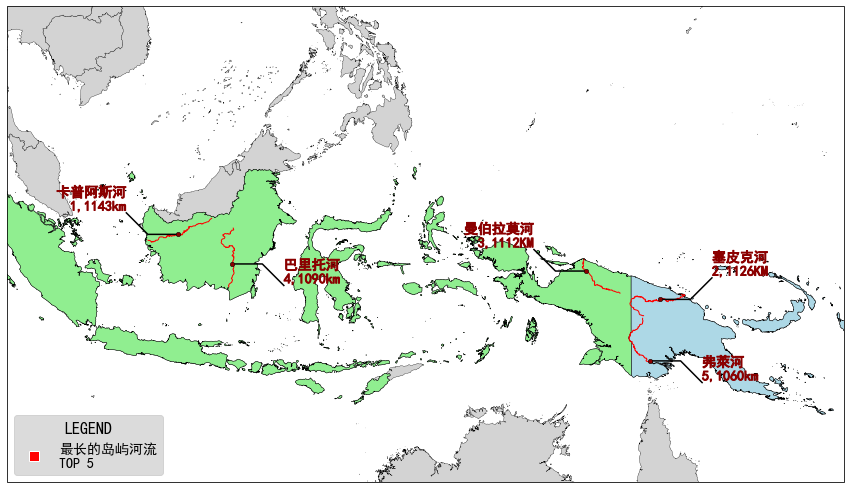

In [2]:
# 岛上的河流

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def loopFillColor(world, countryList, color):
    for country in countryList:
        country_data = world[world['FCNAME'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, transform=ccrs.PlateCarree())


def loopDrawRiver(rivers, riverList, specialList, color):
    for river in riverList:
        river_data = rivers[rivers['name_en'] == river]
        if not river_data.empty:
            river_data.plot(ax=ax, color=color, linewidth=1, transform=ccrs.PlateCarree())
        if any(element[0] == river for element in specialList):
            name = rivers[rivers['name_en'] == river]['name_zh'].values[0]
            rank = [item for item in specialList if item[0] == river][0][6]
            words = name + '\n' + rank
            lon = [item for item in specialList if item[0] == river][0][1]
            lat = [item for item in specialList if item[0] == river][0][2]
            direction1 = [item for item in specialList if item[0] == river][0][3]
            direction2 = [item for item in specialList if item[0] == river][0][4]
            angle = [item for item in specialList if item[0] == river][0][5]
            lineMark(2, angle, 2, lon, lat, direction1, direction2, words, 'darkred')


def lineMark(horizontal_length, angle, line_length, lon, lat, direction1, direction2, content, color):
    if direction1 == 1:
        end_lon = lon + horizontal_length
        end_lat = lat
        if direction2 == 1:
            final_lon = end_lon + line_length * np.cos(np.radians(angle))
            final_lat = end_lat + line_length * np.sin(np.radians(angle))
        elif direction2 == 0:
            final_lon = end_lon + line_length * np.cos(np.radians(angle))
            final_lat = end_lat - line_length * np.sin(np.radians(angle))
        else:
            print('direction2 type error')
        ax.scatter(lon, lat, edgecolor='black', facecolor=color, marker='o', s=20, linewidths=0.5, zorder=5, transform=ccrs.PlateCarree())
        ax.plot([lon, end_lon, final_lon], [lat, end_lat, final_lat], color='black', transform=ccrs.PlateCarree(), zorder=4)
        txt = ax.text(final_lon, final_lat, f"{content}", verticalalignment='bottom', horizontalalignment='left', transform=ccrs.PlateCarree(), fontsize=14, weight='bold', color='darkred')
        txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='darkred')])
    elif direction1 == 0:
        end_lon = lon - horizontal_length
        end_lat = lat
        if direction2 == 1:
            final_lon = end_lon - line_length * np.cos(np.radians(angle))
            final_lat = end_lat + line_length * np.sin(np.radians(angle))
        elif direction2 == 0:
            final_lon = end_lon - line_length * np.cos(np.radians(angle))
            final_lat = end_lat - line_length * np.sin(np.radians(angle))
        else:
            print('direction2 type error')
        ax.scatter(lon, lat, edgecolor='black', facecolor=color, marker='o', s=20, linewidths=0.5, zorder=5, transform=ccrs.PlateCarree())
        ax.plot([lon, end_lon, final_lon], [lat, end_lat, final_lat], color='black', transform=ccrs.PlateCarree(), zorder=4)
        txt = ax.text(final_lon, final_lat, f"{content}", verticalalignment='bottom', horizontalalignment='right', transform=ccrs.PlateCarree(), fontsize=14, weight='bold', color='darkred')
        txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='darkred')])
    else:
        print('direction1 type error')


# 读取地图和河流数据
world = gpd.read_file('./worldmap1/World_countries.shp')
# world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())
rivers = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
rivers = rivers.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())

countries_to_fill1 = ['印度尼西亚']
loopFillColor(world, countries_to_fill1, 'lightgreen')
countries_to_fill2 = ['巴布亚新几内亚']
loopFillColor(world, countries_to_fill2, 'lightblue')
rivers_to_fill = ['Kapuas', 'Barito', 'Fly', 'Sepik', 'Mamberamo', 'Taritatu']
specialList = [['Kapuas', 111.2424848420747, 0.12485335949005141, 0, 1, 45, '1,1143km'], 
               ['Barito', 114.76336254253512, -1.8194250015978013, 1, 0, 45, '4,1090km'], 
               ['Fly', 142.2496519331932, -8.172092779746366, 1, 0, 45, '5,1060km'], 
               ['Sepik', 142.89588674048287, -4.1454953452195, 1, 1, 45, '2,1126KM'], 
               ['Mamberamo', 138.0261227354159, -2.285639547815169, 0, 1, 45, '3,1112KM']]
loopDrawRiver(rivers, rivers_to_fill, specialList, 'red')

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='最长的岛屿河流\nTOP 5', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='LEGEND', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([100, 155, -16, 15], crs=ccrs.PlateCarree())

# 保存图像并显示
plt.savefig('output1.png', dpi=300, bbox_inches='tight')
plt.show()


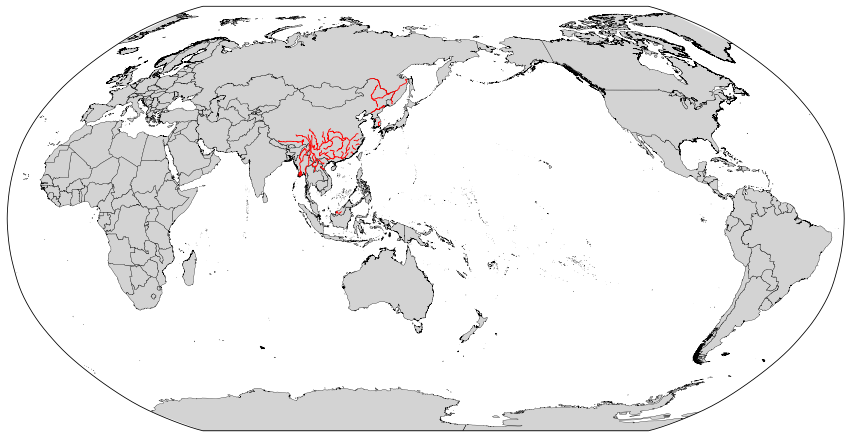

In [5]:
# 江与河
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 世界地图
world = gpd.read_file('./worldmap1/World_countries.shp')
world = world.to_crs(ccrs.PlateCarree())
# 世界河流
rivers = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
filtered_rivers = rivers[rivers['name_zh'].str.contains('江', na=False)] # 过滤出中文名称中有江字的河流
filtered_rivers = filtered_rivers[filtered_rivers['name_zh'] != '雅鲁藏布江'] # 删除原本的雅鲁藏布江数据集
han = rivers[rivers['name_zh'] == '汉水'] # 获取汉水（汉江）数据
lancang = rivers[rivers['name'] == 'Lancang'] # 获取澜沧江数据
filtered_rivers = pd.concat([filtered_rivers, han, lancang])
filtered_rivers = filtered_rivers.to_crs(ccrs.PlateCarree())
# 读取新的雅鲁藏布江数据
ylzb = gpd.read_file('./kml2geojson/ylzb.json')
ylzb = ylzb.to_crs(ccrs.PlateCarree())

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(central_longitude=150)})
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
filtered_rivers.plot(ax=ax, color='red', linewidth=0.8, transform=ccrs.PlateCarree())
ylzb.plot(ax=ax, color='red', linewidth=0.8, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([-180, 180, -60, 75], crs=ccrs.PlateCarree())

plt.savefig('output2.png', dpi=600, bbox_inches='tight')
plt.show()


  id  scalerank featurecla   name name_alt  min_zoom  name_en  min_label  \
8  8          1      River  Chang     None       2.0  Yangtze        3.0   

  wikidataid    label  ...  name_tr       name_vi name_zh       ne_id name_he  \
8      Q5413  Yangtze  ...  Yangtze  Trường Giang      长江  1159113707  יאנגצה   

  name_uk        name_ur      name_fa name_zht  \
8   Янцзи  دریائے یانگزے  رود یانگتسه       長江   

                                            geometry  
8  LINESTRING (90.795 34.3, 91.152 34.321, 92.993...  

[1 rows x 37 columns]
LINESTRING (90.79469607947395 34.300413112926094, 91.15157352088164 34.32090281832983, 92.99280480344106 34.100296128875804, 93.83761111854861 34.32090281832983, 94.15583458860199 34.55639232028389, 94.3889469746706 34.65382823337021, 94.68169396360408 34.6745246445031, 95.0040515482408 34.60171255140386, 95.37482994993496 34.40658234306976, 96.00378380735935 33.88408193616662, 96.4098572123089 33.68094188082726, 97.03281660358742 33.236860459927

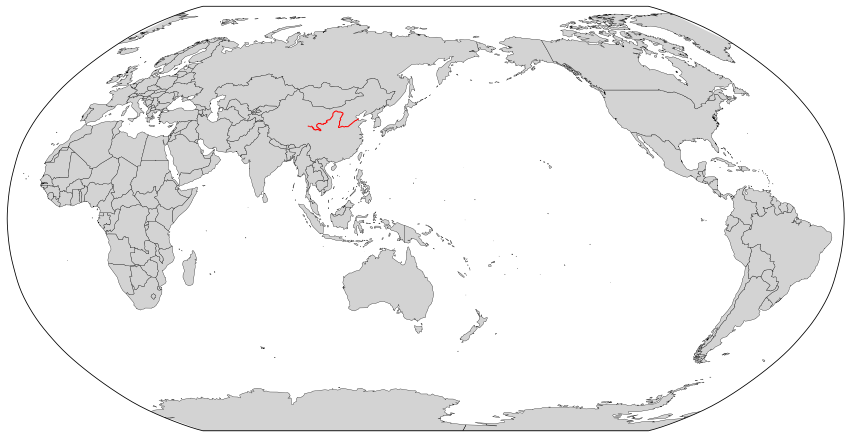

In [8]:
# geojson file of river test
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects
from shapely.geometry import LineString, MultiLineString

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


world = gpd.read_file('./worldmap4/world.json')
world = world.to_crs(ccrs.PlateCarree())

river110m = gpd.read_file('./shp2json/world_river_110m.geojson')
changjiang = river110m[river110m['name_zh'] == '长江']
changjiang = changjiang.to_crs(ccrs.PlateCarree())
changjiang = changjiang[changjiang['id'] == '8']


river50m = gpd.read_file('./shp2json/world_river_50m.geojson')
huanghe = river50m[river50m['name_zh'] == '黄河']
huanghe = huanghe.to_crs(ccrs.PlateCarree())
huanghe1 = huanghe[huanghe['id'] == '28']
huanghe2 = huanghe[huanghe['id'] == '212']
huanghe3 = huanghe[huanghe['id'] == '213']


geometry = changjiang['geometry'].union_all()
print(changjiang)
print(geometry)
if geometry.geom_type == 'LineString':
    coordinates = list(geometry.coords)
    for coor in coordinates:
        print(coor[0]) 
elif geometry.geom_type == 'MultiLineString':
    coordinates = [list(line.coords) for line in geometry.geoms] 
else:
    coordinates = [] 
print(coordinates)

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(central_longitude=150)})
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())
# changjiang.plot(ax=ax, color='red', linewidth=0.8, transform=ccrs.PlateCarree())
# huanghe1.plot(ax=ax, color='red', linewidth=1, transform=ccrs.PlateCarree())
# huanghe2.plot(ax=ax, color='blue', linewidth=1, transform=ccrs.PlateCarree())
# huanghe3.plot(ax=ax, color='green', linewidth=1, transform=ccrs.PlateCarree())
huanghe.plot(ax=ax, color='red', linewidth=1, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([-180, 180, -60, 75], crs=ccrs.PlateCarree())

plt.savefig('output2.png', dpi=600, bbox_inches='tight')
plt.show()


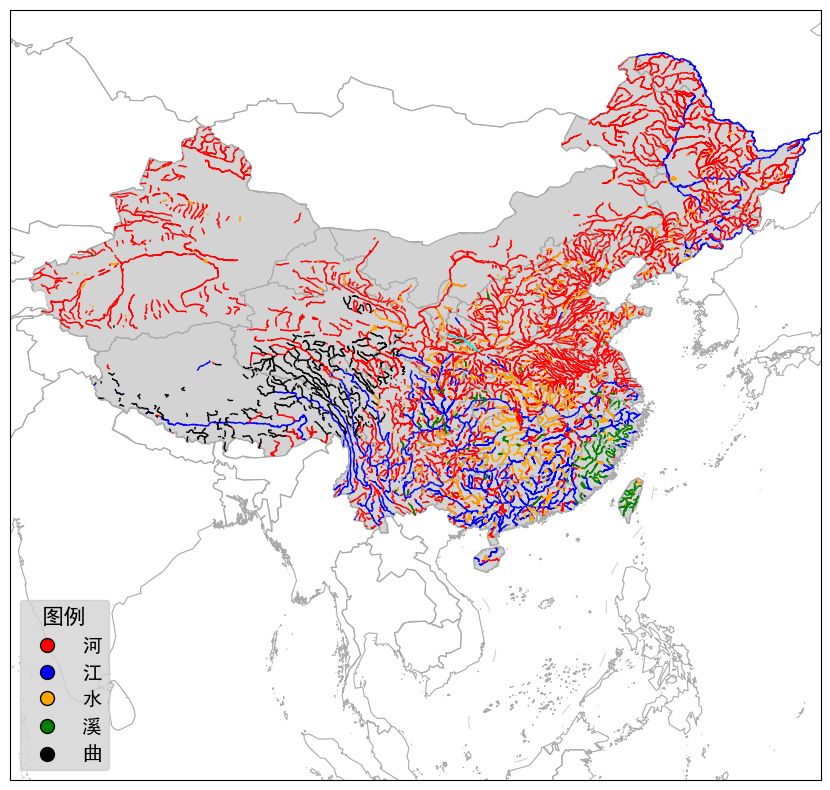

In [2]:
# geojson file of river test
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects
from shapely.geometry import LineString, MultiLineString

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

world = gpd.read_file('./worldmap4/world.geojson')
world = world.to_crs(ccrs.PlateCarree())
china = gpd.read_file('./shp2json/chinaprovince.geojson')
china = china.to_crs(ccrs.PlateCarree())

river1 = gpd.read_file('./river/level1/level1.shp')
river1 = river1.to_crs(ccrs.PlateCarree())
river2 = gpd.read_file('./river/level2/level2.shp')
river2 = river2.to_crs(ccrs.PlateCarree())
river3 = gpd.read_file('./river/level3/level3.shp')
river3 = river3.to_crs(ccrs.PlateCarree())
river4 = gpd.read_file('./river/level4/level4.shp')
river4 = river4.to_crs(ccrs.PlateCarree())
river5 = gpd.read_file('./river/level5/level5.shp')
river5 = river5.to_crs(ccrs.PlateCarree())
river_all = pd.concat([river1, river2, river3, river4, river5])
jiang = river_all[river_all['NAME'].str.contains('江', na=False)]
he = river_all[river_all['NAME'].str.contains('河', na=False)]
shui = river_all[river_all['NAME'].str.contains('水', na=False)]
xi = river_all[river_all['NAME'].str.contains('溪', na=False)]
qu = river_all[river_all['NAME'].str.contains('曲', na=False)]
jian = river_all[river_all['NAME'].str.contains('泾', na=False)]
heilongjiang = gpd.read_file('./river/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')
heilongjiang = heilongjiang.to_crs(ccrs.PlateCarree())
heilongjiang = heilongjiang[heilongjiang['name_zh'] == '黑龙江'] 


fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='none', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
china.plot(ax=ax, color='lightgrey', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
jiang.plot(ax=ax, color='blue', linewidth=1, transform=ccrs.PlateCarree())
he.plot(ax=ax, color='red', linewidth=1, transform=ccrs.PlateCarree())
shui.plot(ax=ax, color='orange', linewidth=1, transform=ccrs.PlateCarree())
xi.plot(ax=ax, color='green', linewidth=1, transform=ccrs.PlateCarree())
qu.plot(ax=ax, color='black', linewidth=1, transform=ccrs.PlateCarree())
jian.plot(ax=ax, color='cyan', linewidth=1, transform=ccrs.PlateCarree())
heilongjiang.plot(ax=ax, color='blue', linewidth=1, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=10, label='河', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=10, label='江', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='orange', markersize=10, label='水', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='green', markersize=10, label='溪', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='black', markersize=10, label='曲', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([72, 136, 2, 56], crs=ccrs.PlateCarree())

# plt.savefig('output2.png', dpi=600, bbox_inches='tight')
plt.show()


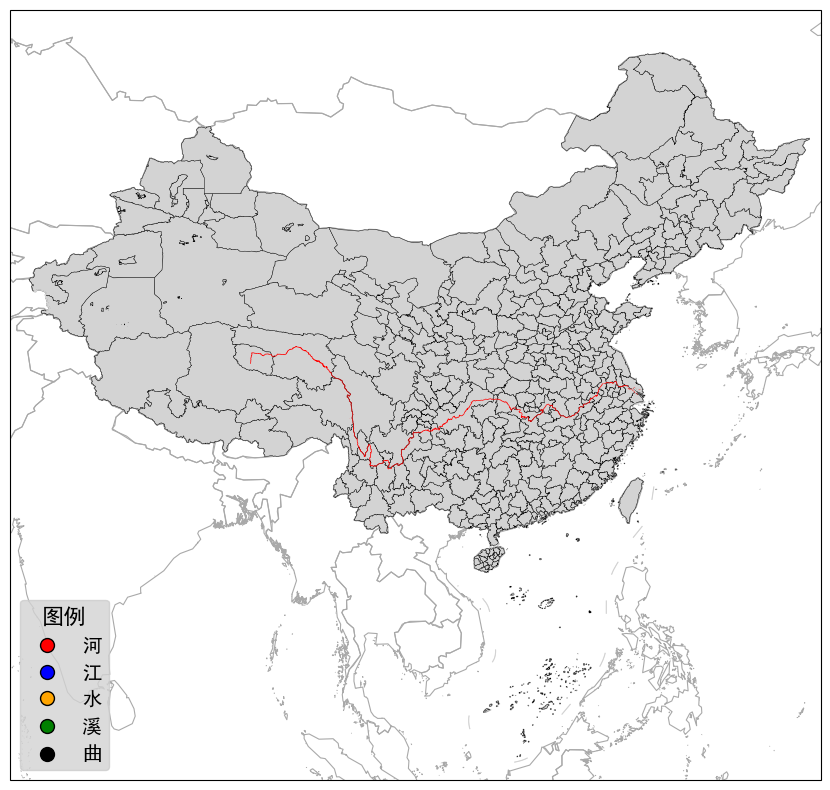

In [7]:
# geojson file of river test
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects
from shapely.geometry import LineString, MultiLineString

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

world = gpd.read_file('./worldmap4/world.geojson')
world = world.to_crs(ccrs.PlateCarree())
china = gpd.read_file('./shp2json/chinaprovince.geojson')
china = china.to_crs(ccrs.PlateCarree())
province = gpd.read_file('./shp2json/chinacity.geojson')
province = province.to_crs(ccrs.PlateCarree())

river1 = gpd.read_file('./river/level1/level1.shp')
river1 = river1.to_crs(ccrs.PlateCarree())
changjiang = river1[river1['NAME'] == '长江'] 
jinshajiang = river1[river1['NAME'] == '金沙江']
tongtianhe = river1[river1['NAME'] == '通天河']
tuotuohe = river1[river1['NAME'] == '沱沱河']
river = pd.concat([changjiang, jinshajiang, tongtianhe, tuotuohe])
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='none', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
china.plot(ax=ax, color='lightgrey', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
province.plot(ax=ax, color='lightgrey', edgecolor='k', linewidth=0.3, transform=ccrs.PlateCarree())
river.plot(ax=ax, color='red', linewidth=0.5, transform=ccrs.PlateCarree())


legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=10, label='河', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=10, label='江', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='orange', markersize=10, label='水', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='green', markersize=10, label='溪', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='black', markersize=10, label='曲', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([72, 136, 2, 56], crs=ccrs.PlateCarree())

plt.savefig('test.png', dpi=2000, bbox_inches='tight')
plt.show()


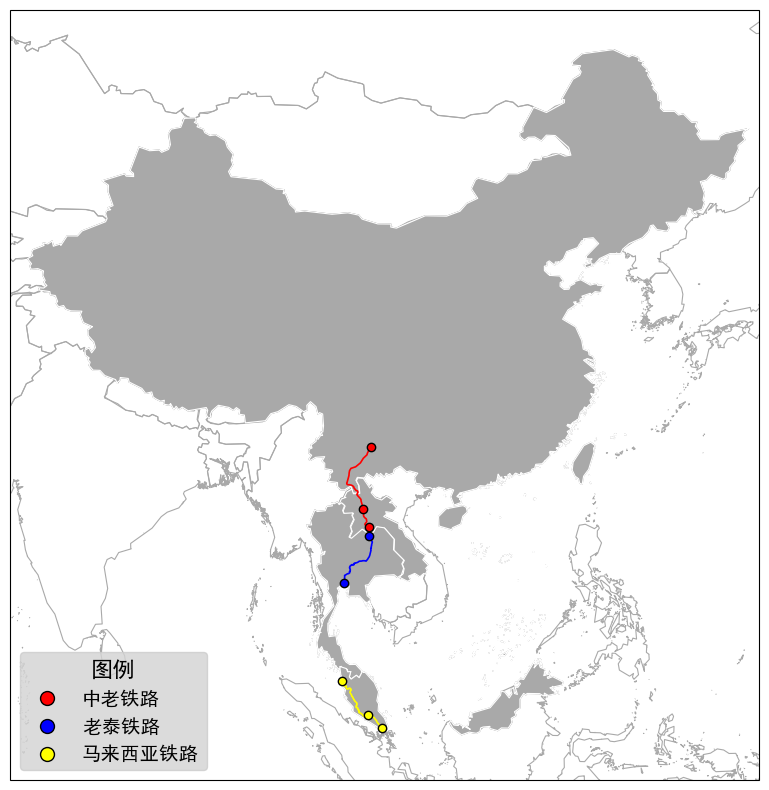

In [4]:
# China-Laos-Thailand-Malaysia-Singapore trians compare
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def loopFillColor(world, ax, countryList, color):
    for country in countryList:
        country_data = world[world['NAME_CHN'] == country]
        if not country_data.empty:
            country_data.plot(ax=ax, color=color, edgecolor='white', linewidth=0.8, transform=ccrs.PlateCarree())


world = gpd.read_file('./worldmap4/world.geojson')
world = world.to_crs(ccrs.PlateCarree())

lat1, lon1 = 24.900517541950194, 102.82233979816232   # 昆明
lat2, lon2 = 19.887929264133415, 102.14993202253484   # 琅勃拉邦
lat3, lon3 = 18.37567090187491, 102.64085689210347   # 万象1
lat3_, lon3_ = 17.67567090187491, 102.64085689210347   # 万象2
lat4, lon4 = 13.781012413822213, 100.52639829532824   # 曼谷
lat5, lon5 = 5.414172605411322, 100.38983201205296   # 槟城
lat6, lon6 = 2.5816085966821998, 102.61260431970223   # 金马士
lat7, lon7 = 1.4265019203095592, 103.77170239297176   # 新加坡

line_malaysia = gpd.read_file('./kml2geojson/malaysia.geojson')
line_malaysia = line_malaysia.to_crs(ccrs.PlateCarree())
line_china_laos_thailand = gpd.read_file('./kml2geojson/china_laos_thailand.geojson')
line_china_laos_thailand = line_china_laos_thailand.to_crs(ccrs.PlateCarree())
line_china = line_china_laos_thailand[line_china_laos_thailand['name'] == '中老']
line_thailand = line_china_laos_thailand[line_china_laos_thailand['name'] == '老泰']

fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
world.plot(ax=ax, color='none', edgecolor='darkgray', linewidth=0.8, transform=ccrs.PlateCarree())
countries_to_fill1 = ['中国', '老挝', '泰国', '马来西亚', '新加坡']
loopFillColor(world, ax, countries_to_fill1, 'darkgray')
ax.scatter([lon1, lon2, lon3], [lat1, lat2, lat3], color='red', edgecolor='black', marker='o', zorder=5, transform=ccrs.PlateCarree())
ax.scatter([lon3_, lon4], [lat3_, lat4], color='blue', edgecolor='black', marker='o', zorder=5, transform=ccrs.PlateCarree())
ax.scatter([lon5, lon6, lon7], [lat5, lat6, lat7], color='yellow', edgecolor='black', marker='o', zorder=5, transform=ccrs.PlateCarree())
line_china.plot(ax=ax, color='red', linewidth=1.2, transform=ccrs.PlateCarree())
line_thailand.plot(ax=ax, color='blue', linewidth=1.2, transform=ccrs.PlateCarree())
line_malaysia.plot(ax=ax, color='yellow', linewidth=1.2, transform=ccrs.PlateCarree())

legend_elements = [
    Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=10, label='中老铁路', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=10, label='老泰铁路', linestyle='None'),
    Line2D([0], [0], marker='o', color='k', markerfacecolor='yellow', markersize=10, label='马来西亚铁路', linestyle='None')
]
legend = ax.legend(handles=legend_elements, loc='lower left', title='图例', title_fontsize=16,prop={'size': 14})
legend.get_frame().set_facecolor('lightgray')

ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([72, 136, -3, 56], crs=ccrs.PlateCarree())

plt.savefig('output2.png', dpi=1200, bbox_inches='tight')
plt.show()


In [4]:
import geopandas as gpd

test_data = gpd.read_file('./cultural/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp')
test_data.head(5)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 states provinces,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 states provinces,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20012 -32.4472, -58.20011 -32.44..."
2,Admin-1 states provinces,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
3,Admin-1 states provinces,6,MYS-1186,1186,MY-12,None,MY,5,Sabah,North Borneo,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,Admin-1 states provinces,3,CHL-2694,2694,CL-AP,None,CL,1,Arica y Parinacota,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."


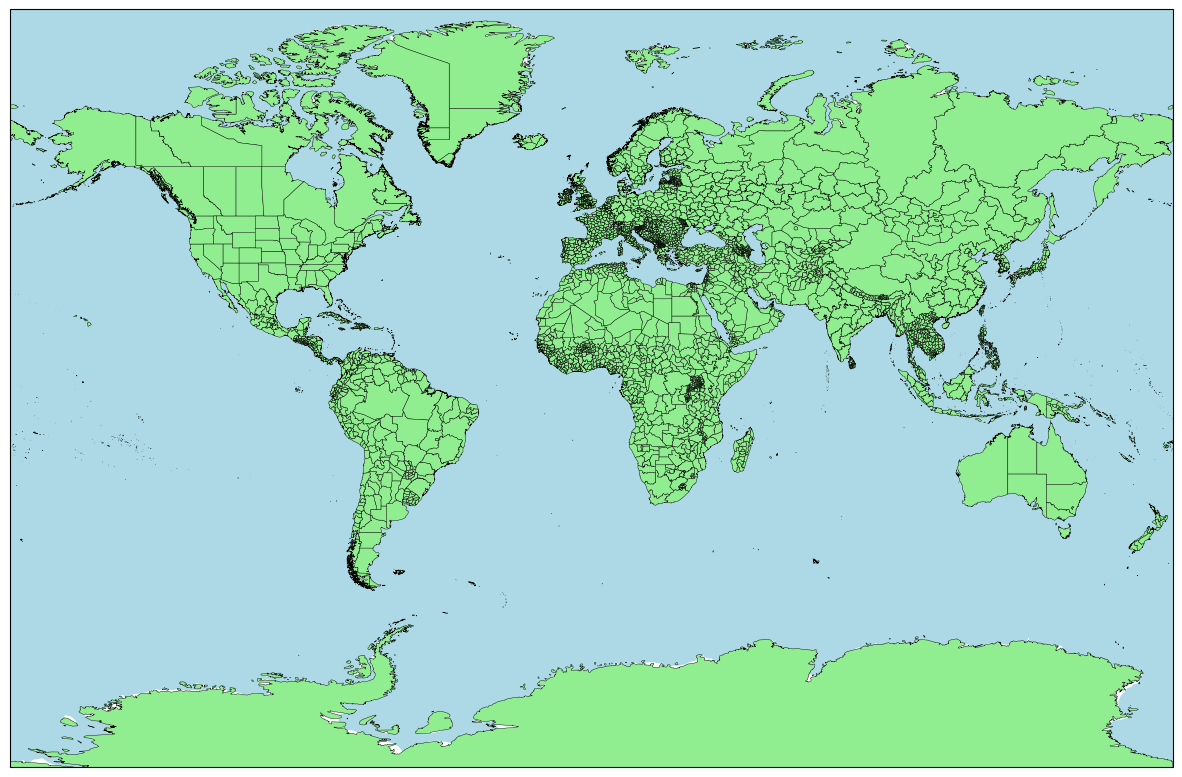

In [5]:
# 世界一级行政区
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# 读取地图数据
world = gpd.read_file('./cultural/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp')
world = world.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller()})
ax.add_feature(cfeature.OCEAN, color='lightblue')
world.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
ax.set_extent([-180, 180, -85, 85], crs=ccrs.PlateCarree())
plt.savefig('output1.png', dpi=1200, bbox_inches='tight')
plt.show()


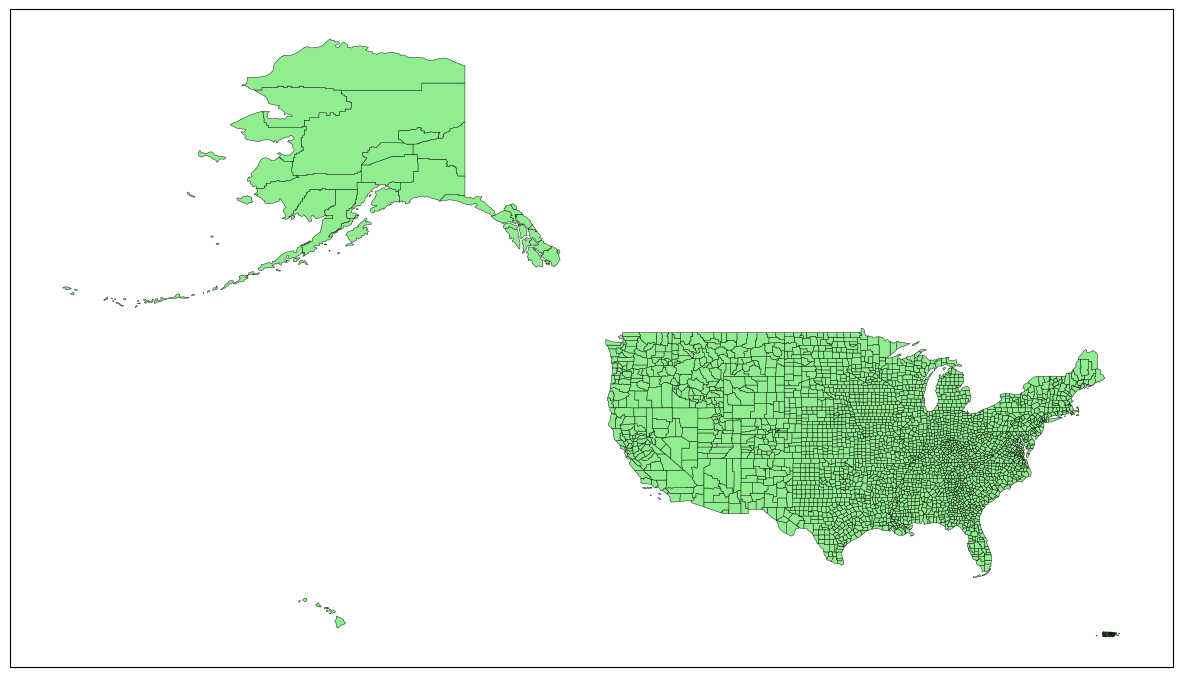

In [ ]:
# 美国县城
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D

# 读取地图数据
world = gpd.read_file('./shp2json/us_county.geojson')
world = world.to_crs(ccrs.PlateCarree())
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Miller(central_longitude=-100)})
world.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, transform=ccrs.PlateCarree())


ax.tick_params(axis='both', which='both', length=0, labelsize=0)
# ax.set_extent([170, -60, 10, 75], crs=ccrs.PlateCarree())
plt.savefig('output2.png', dpi=1200, bbox_inches='tight')
plt.show()
